# Loading data from the google drive

Load the google drive

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# project_path = '/content/drive/My Drive/assignments/'
# %tensorflow_version 2.x

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
import seaborn as sn
import matplotlib.pyplot as plt

Import h5py library to load the data 

In [2]:
import h5py

For colaboratory

In [0]:
# dataset_file = project_path + 'SVHN_single_grey1-2.h5'

# Data fetching and understand the train/val/test splits

In [6]:
# f = h5py.File(dataset_file) # For google colab

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


Load data from the local drive

In [6]:
f = h5py.File("./SVHN_single_grey1-2.h5")

C:\Users\tiwar\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


1. List the keys in the file.
2. They hold the test and train data set

In [5]:
list(f.keys())

[]

In [8]:
X_test = f['X_test'].value
X_train = f['X_train'].value
y_test = f['y_test'].value
y_train = f['y_train'].value
X_val = f['X_val'].value
y_val = f['y_val'].value

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: H5pyDeprecation

In [9]:
print("X_test", X_test.shape)
print("X_train", X_train.shape)
print("X_val", X_val.shape)

X_test (18000, 32, 32)
X_train (42000, 32, 32)
X_val (60000, 32, 32)


In [0]:
num_classes = 10 # As there can be 10 dijits 0-9 to be identified.
X_train = X_train.reshape(42000, 1024) 
X_test = X_test.reshape(18000, 1024)      # Images are flattended out into a vector of 784 elements
X_train = X_train.astype('float32')      # Change the data type to float from integer (0 - 255)
X_test = X_test.astype('float32')
X_train /= 255                           # Scale the data between 0 and 1
X_test /= 255
y_train = tf.keras.utils.to_categorical(y_train, num_classes)   # Converting the target into categorical which is stored as numeric
y_test = tf.keras.utils.to_categorical(y_test, num_classes)     # Keras converst these into 1-hot coded vectors as these are lables 

The file contains the train and test data set split in ratio in 30:70 ratio, i.e 70% for taining dataset and 30% for test dataset.

# Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) 

Tensorflow.Keras model object can be created with Sequential class

At the outset, the model is empty per se. It is completed by adding additional layers and compilation

Try different options with epochs and batch sizes to get an optimal model. To start with taking 50% model data as batch size with 100 epochs 

In [15]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(1024,)))   #First hidden layer of 1024  neurons, each neuron takes input 
                                                               # vector of size 1024



model.add(Dense(num_classes, activation='softmax'))            # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

dense_4 (None, 1024) ==> (None, 1024)
dense_5 (None, 1024) ==> (None, 10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10250     
Total params: 1,059,850
Trainable params: 1,059,850
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
3/3 [==============================] - 0s 101ms/step - loss: 3.4776 - accuracy: 0.0962 - val_loss: 2.8860 - val_accuracy: 0.1028
Epoch 2/100
3/3 [==============================] - 0s 70ms/step - loss: 2.8272 - accuracy: 0.1054 - val_loss: 2.8325 - val_accuracy: 0.1043
Epoch 3/100
3/3 [==============================] - 0s 67ms/step - loss: 2.7817 - accuracy: 0.1017 - val_loss: 2.4636 - val_accuracy: 0.0970
Epoch 4/100
3/3 [==============================] - 0s 69ms/step - loss: 2.4001 - accuracy: 0.1029 - val_loss: 2.3393 - val_accuracy: 0.1089
Epoch 5/100
3/3 [==============================] - 0s 61ms/step - loss: 2.3634 - accuracy: 0.1027 - val_loss: 2.3954 - val_accuracy: 0.1008
Epoch 6/100
3/3 [==============================] - 0s 62ms/step - loss: 2.3822 - accuracy: 0.1014 - val_loss: 2.3130 - val_accuracy: 0.1116
Epoch 7/100
3/3 [==============================] - 0s 65ms/step - loss: 2.3120 - accuracy: 0.1191 - val_loss: 2.3214 - val_accuracy: 0.1077
Epoch 8/100
3/3 [==

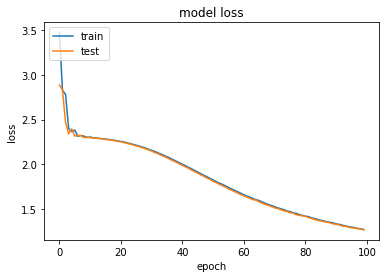

In [16]:
batch_size = 20000
epochs = 100
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )


score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Observations on  the above model:
1. The model has been created without BatchNormalizations and early stoppings
2. It has been observed that there is a steady fall in loss and increase in accuracy.
3. The steady fall in  loss and increased accuracy for 100 epochs might mean that the global minima might not have appeared. This is evident from the graph above.

Let's try with higher epocs and early stopping.

## Apply higher epochs with early stoppings

In [17]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(1024,)))   #First hidden layer of 1024  neurons, each neuron takes input 
                                                               # vector of size 1024



model.add(Dense(num_classes, activation='softmax'))            # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

dense_6 (None, 1024) ==> (None, 1024)
dense_7 (None, 1024) ==> (None, 10)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10250     
Total params: 1,059,850
Trainable params: 1,059,850
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/400
3/3 [==============================] - 0s 99ms/step - loss: 2.9605 - accuracy: 0.1010 - val_loss: 3.2182 - val_accuracy: 0.1062
Epoch 2/400
3/3 [==============================] - 0s 111ms/step - loss: 2.8927 - accuracy: 0.1091 - val_loss: 2.5329 - val_accuracy: 0.1074
Epoch 3/400
3/3 [==============================] - 0s 65ms/step - loss: 2.5894 - accuracy: 0.1004 - val_loss: 2.4065 - val_accuracy: 0.1052
Epoch 4/400
3/3 [==============================] - 0s 62ms/step - loss: 2.3869 - accuracy: 0.1038 - val_loss: 2.3675 - val_accuracy: 0.1040
Epoch 5/400
3/3 [==============================] - 0s 59ms/step - loss: 2.3723 - accuracy: 0.1007 - val_loss: 2.3633 - val_accuracy: 0.1034
Epoch 6/400
3/3 [==============================] - 0s 68ms/step - loss: 2.3474 - accuracy: 0.1036 - val_loss: 2.3094 - val_accuracy: 0.1059
Epoch 7/400
3/3 [==============================] - 0s 60ms/step - loss: 2.3091 - accuracy: 0.1095 - val_loss: 2.3223 - val_accuracy: 0.1119
Epoch 8/400
3/3 [==

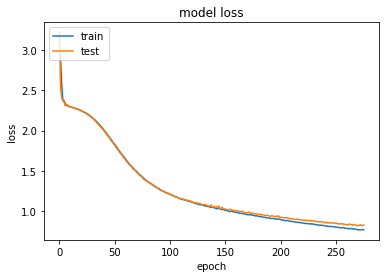

In [18]:
batch_size = 20000
epochs = 400   # Setting up higher epoch in persuit of finding global moinima,
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)   # Set up early stopping to avoid wastage of computing power
                                                                            # Kept patience level to 5 to check for considerable time to get out of local minima if possible
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [es],
                    validation_data=(X_test, y_test)
                    )


score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Observations
1. With higher epochs we were able to find better global minima
2. The early stop made sure to avoid trying more time and wasting power. With the test run the early stopping was made at about 280 epochs.
3. The test accuracy is at about 76%

Trying with Batch Normalization technique

# Implement batch normalization for training the neural network

In [19]:
model = Sequential()
model.add(BatchNormalization(input_shape=(1024,))) # Set the batch normalization with input shape 32 x 32
model.add(Dense(1024, activation='relu', input_shape=(1024,)))   #First hidden layer of 1024  neurons, each neuron takes input 
                                                               # vector of size 1024



model.add(Dense(num_classes, activation='softmax'))            # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

batch_normalization (None, 1024) ==> (None, 1024)
dense_8 (None, 1024) ==> (None, 1024)
dense_9 (None, 1024) ==> (None, 10)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10250     
Total params: 1,063,946
Trainable params: 1,061,898
Non-trainable params: 2,048
_________________________________________________________________
None


Epoch 1/400
3/3 [==============================] - 0s 114ms/step - loss: 3.1868 - accuracy: 0.1114 - val_loss: 3.3515 - val_accuracy: 0.0988
Epoch 2/400
3/3 [==============================] - 0s 79ms/step - loss: 3.6821 - accuracy: 0.1485 - val_loss: 2.6308 - val_accuracy: 0.0988
Epoch 3/400
3/3 [==============================] - 0s 77ms/step - loss: 3.1319 - accuracy: 0.1785 - val_loss: 2.5903 - val_accuracy: 0.0965
Epoch 4/400
3/3 [==============================] - 0s 70ms/step - loss: 2.5242 - accuracy: 0.2447 - val_loss: 2.4133 - val_accuracy: 0.1003
Epoch 5/400
3/3 [==============================] - 0s 68ms/step - loss: 2.3925 - accuracy: 0.2745 - val_loss: 2.3579 - val_accuracy: 0.1333
Epoch 6/400
3/3 [==============================] - 0s 76ms/step - loss: 2.0960 - accuracy: 0.3466 - val_loss: 2.2913 - val_accuracy: 0.1493
Epoch 7/400
3/3 [==============================] - 0s 71ms/step - loss: 1.9699 - accuracy: 0.3805 - val_loss: 2.2801 - val_accuracy: 0.1719
Epoch 8/400
3/3 [==

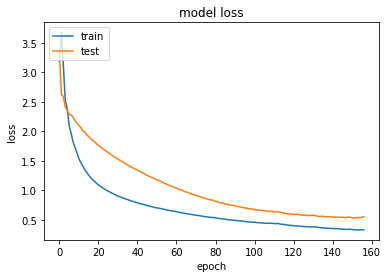

In [20]:
batch_size = 20000
epochs = 400   # Setting up higher epoch in persuit of finding global moinima,
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)   # Set up early stopping to avoid wastage of computing power
                                                                            # Kept patience level to 5 to check for considerable time to get out of local minima if possible
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [es],
                    validation_data=(X_test, y_test)
                    )


score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Observations
1. The BatchNormalization performs much better compared without normalization.
2. The loss functions is pretty step as compared to without normalization. 
3. The accuracy reaches to highest level pity soon.

The batch normalization is much better with accuracy close to 85%.

## Try different batch size options to get the optimal batch size.

Take the full data as batch size with higher epoch 

In [22]:
model = Sequential()
model.add(BatchNormalization(input_shape=(1024,))) # Set the batch normalization with input shape 32 x 32
model.add(Dense(1024, activation='relu', input_shape=(1024,)))   #First hidden layer of 1024  neurons, each neuron takes input 
                                                               # vector of size 1024



model.add(Dense(num_classes, activation='softmax'))            # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

batch_normalization_2 (None, 1024) ==> (None, 1024)
dense_12 (None, 1024) ==> (None, 1024)
dense_13 (None, 1024) ==> (None, 10)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_13 (Dense)             (None, 10)                10250     
Total params: 1,063,946
Trainable params: 1,061,898
Non-trainable params: 2,048
_________________________________________________________________
None


Epoch 1/400
2/2 [==============================] - 0s 116ms/step - loss: 2.7888 - accuracy: 0.1055 - val_loss: 3.4234 - val_accuracy: 0.1004
Epoch 2/400
2/2 [==============================] - 0s 55ms/step - loss: 3.6994 - accuracy: 0.1286 - val_loss: 3.5508 - val_accuracy: 0.1084
Epoch 3/400
2/2 [==============================] - 0s 53ms/step - loss: 4.0634 - accuracy: 0.1544 - val_loss: 3.2868 - val_accuracy: 0.1001
Epoch 4/400
2/2 [==============================] - 0s 53ms/step - loss: 3.6634 - accuracy: 0.1746 - val_loss: 3.0254 - val_accuracy: 0.0955
Epoch 5/400
2/2 [==============================] - 0s 51ms/step - loss: 3.2861 - accuracy: 0.1910 - val_loss: 2.3583 - val_accuracy: 0.1397
Epoch 6/400
2/2 [==============================] - 0s 53ms/step - loss: 2.6776 - accuracy: 0.2312 - val_loss: 2.5116 - val_accuracy: 0.1088
Epoch 7/400
2/2 [==============================] - 0s 54ms/step - loss: 2.3323 - accuracy: 0.2580 - val_loss: 2.5289 - val_accuracy: 0.1469
Epoch 8/400
2/2 [==

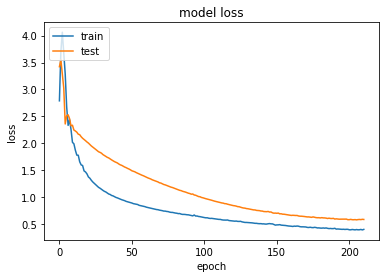

In [23]:
batch_size = 40000
epochs = 400   # Setting up higher epoch in persuit of finding global moinima,
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)   # Set up early stopping to avoid wastage of computing power
                                                                            # Kept patience level to 5 to check for considerable time to get out of local minima if possible
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [es],
                    validation_data=(X_test, y_test)
                    )


score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Observation:

Taking the full batch size took higher number of epochs to stabilize the model as compared to half size of 20000. Also the accuracy is lower.

Going for other batch size options.

### Batch size as 10000

In [24]:
model = Sequential()
model.add(BatchNormalization(input_shape=(1024,))) # Set the batch normalization with input shape 32 x 32
model.add(Dense(1024, activation='relu', input_shape=(1024,)))   #First hidden layer of 1024  neurons, each neuron takes input 
                                                               # vector of size 1024



model.add(Dense(num_classes, activation='softmax'))            # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

batch_normalization_3 (None, 1024) ==> (None, 1024)
dense_14 (None, 1024) ==> (None, 1024)
dense_15 (None, 1024) ==> (None, 10)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_15 (Dense)             (None, 10)                10250     
Total params: 1,063,946
Trainable params: 1,061,898
Non-trainable params: 2,048
_________________________________________________________________
None


Epoch 1/400
5/5 [==============================] - 0s 83ms/step - loss: 3.9757 - accuracy: 0.1120 - val_loss: 3.0747 - val_accuracy: 0.1042
Epoch 2/400
5/5 [==============================] - 0s 61ms/step - loss: 3.6893 - accuracy: 0.1559 - val_loss: 2.6374 - val_accuracy: 0.1006
Epoch 3/400
5/5 [==============================] - 0s 55ms/step - loss: 2.6091 - accuracy: 0.2264 - val_loss: 2.7735 - val_accuracy: 0.1154
Epoch 4/400
5/5 [==============================] - 0s 56ms/step - loss: 2.2544 - accuracy: 0.3204 - val_loss: 2.2979 - val_accuracy: 0.1116
Epoch 5/400
5/5 [==============================] - 0s 54ms/step - loss: 2.0203 - accuracy: 0.3660 - val_loss: 2.3205 - val_accuracy: 0.2092
Epoch 6/400
5/5 [==============================] - 0s 52ms/step - loss: 1.8065 - accuracy: 0.4355 - val_loss: 2.1586 - val_accuracy: 0.3288
Epoch 7/400
5/5 [==============================] - 0s 55ms/step - loss: 1.6418 - accuracy: 0.4941 - val_loss: 2.1305 - val_accuracy: 0.3497
Epoch 8/400
5/5 [===

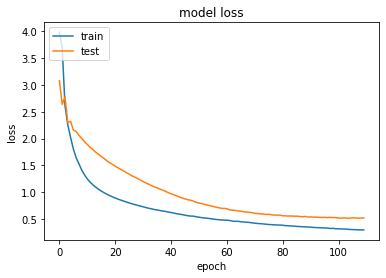

In [25]:
batch_size = 10000
epochs = 400   # Setting up higher epoch in persuit of finding global moinima,
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)   # Set up early stopping to avoid wastage of computing power
                                                                            # Kept patience level to 5 to check for considerable time to get out of local minima if possible
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [es],
                    validation_data=(X_test, y_test)
                    )


score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Observation:

Performs better than 20000 batch size as it takes less number of epochs to converge and provides same (slightly higher accuracy)

### Batch size 512 - though not optimal but still checking

In [26]:
model = Sequential()
model.add(BatchNormalization(input_shape=(1024,))) # Set the batch normalization with input shape 32 x 32
model.add(Dense(1024, activation='relu', input_shape=(1024,)))   #First hidden layer of 1024  neurons, each neuron takes input 
                                                               # vector of size 1024



model.add(Dense(num_classes, activation='softmax'))            # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

batch_normalization_4 (None, 1024) ==> (None, 1024)
dense_16 (None, 1024) ==> (None, 1024)
dense_17 (None, 1024) ==> (None, 10)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_17 (Dense)             (None, 10)                10250     
Total params: 1,063,946
Trainable params: 1,061,898
Non-trainable params: 2,048
_________________________________________________________________
None


Epoch 1/400
83/83 [==============================] - 1s 11ms/step - loss: 1.7867 - accuracy: 0.4719 - val_loss: 1.6933 - val_accuracy: 0.5921
Epoch 2/400
83/83 [==============================] - 1s 10ms/step - loss: 0.9795 - accuracy: 0.7056 - val_loss: 1.2630 - val_accuracy: 0.6897
Epoch 3/400
83/83 [==============================] - 1s 10ms/step - loss: 0.8356 - accuracy: 0.7474 - val_loss: 0.9587 - val_accuracy: 0.7458
Epoch 4/400
83/83 [==============================] - 1s 10ms/step - loss: 0.7381 - accuracy: 0.7807 - val_loss: 0.9380 - val_accuracy: 0.7362
Epoch 5/400
83/83 [==============================] - 1s 10ms/step - loss: 0.6586 - accuracy: 0.8068 - val_loss: 1.3214 - val_accuracy: 0.6606
Epoch 6/400
83/83 [==============================] - 1s 10ms/step - loss: 0.6731 - accuracy: 0.8065 - val_loss: 0.7163 - val_accuracy: 0.7906
Epoch 7/400
83/83 [==============================] - 1s 10ms/step - loss: 0.5754 - accuracy: 0.8301 - val_loss: 0.6937 - val_accuracy: 0.7983
Epoch 

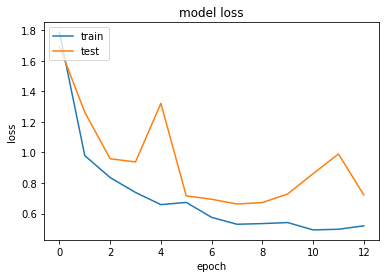

In [27]:
batch_size = 512
epochs = 400   # Setting up higher epoch in persuit of finding global moinima,
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)   # Set up early stopping to avoid wastage of computing power
                                                                            # Kept patience level to 5 to check for considerable time to get out of local minima if possible
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [es],
                    validation_data=(X_test, y_test)
                    )


score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Observation: The graph shows that the model might be jumping in local mimima and it breaks at a lower epoch. The model seems to be a highly overfitting model and may not perform well as evident from the graph above. Also because of its overfitted nature the model seems to memorize more in training but testing seems to fail miserably so not a good model for production.



### Trying with 1024 batch size


In [28]:
model = Sequential()
model.add(BatchNormalization(input_shape=(1024,))) # Set the batch normalization with input shape 32 x 32
model.add(Dense(1024, activation='relu', input_shape=(1024,)))   #First hidden layer of 1024  neurons, each neuron takes input 
                                                               # vector of size 1024



model.add(Dense(num_classes, activation='softmax'))            # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

batch_normalization_5 (None, 1024) ==> (None, 1024)
dense_18 (None, 1024) ==> (None, 1024)
dense_19 (None, 1024) ==> (None, 10)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_5 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_19 (Dense)             (None, 10)                10250     
Total params: 1,063,946
Trainable params: 1,061,898
Non-trainable params: 2,048
_________________________________________________________________
None


Epoch 1/400
42/42 [==============================] - 1s 17ms/step - loss: 0.5580 - accuracy: 0.8541 - val_loss: 0.6295 - val_accuracy: 0.8289
Epoch 2/400
42/42 [==============================] - 1s 14ms/step - loss: 0.4200 - accuracy: 0.8769 - val_loss: 0.6675 - val_accuracy: 0.8235
Epoch 3/400
42/42 [==============================] - 1s 13ms/step - loss: 0.3551 - accuracy: 0.8965 - val_loss: 0.5581 - val_accuracy: 0.8491
Epoch 4/400
42/42 [==============================] - 1s 13ms/step - loss: 0.3413 - accuracy: 0.8982 - val_loss: 0.6965 - val_accuracy: 0.8179
Epoch 5/400
42/42 [==============================] - 1s 13ms/step - loss: 0.4122 - accuracy: 0.8790 - val_loss: 0.6630 - val_accuracy: 0.8254
Epoch 6/400
42/42 [==============================] - 1s 13ms/step - loss: 0.4473 - accuracy: 0.8700 - val_loss: 0.6738 - val_accuracy: 0.8218
Epoch 7/400
42/42 [==============================] - 1s 13ms/step - loss: 0.3619 - accuracy: 0.8933 - val_loss: 0.5950 - val_accuracy: 0.8409
Epoch 

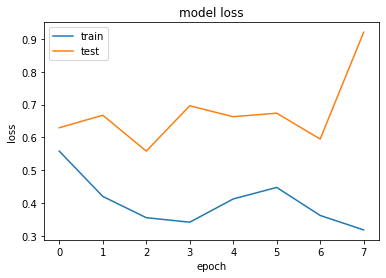

In [30]:
batch_size = 1024
epochs = 400   # Setting up higher epoch in persuit of finding global moinima,
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)   # Set up early stopping to avoid wastage of computing power
                                                                            # Kept patience level to 5 to check for considerable time to get out of local minima if possible
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [es],
                    validation_data=(X_test, y_test)
                    )


score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Observations: 
The model again as model with 512 batch size seems an highly overfitting model with lot of fluctuation in the graph. Also because of its overfitted nature the model seems to memorize more in training but testing seems to fail miserably so not a good model for production.

### Trying with batch size of 5000

In [36]:
model = Sequential()
model.add(BatchNormalization(input_shape=(1024,))) # Set the batch normalization with input shape 32 x 32
model.add(Dense(1024, activation='relu', input_shape=(1024,)))   #First hidden layer of 1024  neurons, each neuron takes input 
                                                               # vector of size 1024



model.add(Dense(num_classes, activation='softmax'))            # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

batch_normalization_9 (None, 1024) ==> (None, 1024)
dense_26 (None, 1024) ==> (None, 1024)
dense_27 (None, 1024) ==> (None, 10)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_9 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_26 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_27 (Dense)             (None, 10)                10250     
Total params: 1,063,946
Trainable params: 1,061,898
Non-trainable params: 2,048
_________________________________________________________________
None


Epoch 1/400
9/9 [==============================] - 0s 54ms/step - loss: 3.7712 - accuracy: 0.1413 - val_loss: 2.7047 - val_accuracy: 0.1031
Epoch 2/400
9/9 [==============================] - 0s 38ms/step - loss: 2.5268 - accuracy: 0.2593 - val_loss: 2.3181 - val_accuracy: 0.1199
Epoch 3/400
9/9 [==============================] - 0s 37ms/step - loss: 1.9449 - accuracy: 0.3756 - val_loss: 2.2092 - val_accuracy: 0.2371
Epoch 4/400
9/9 [==============================] - 0s 35ms/step - loss: 1.6248 - accuracy: 0.4963 - val_loss: 2.0951 - val_accuracy: 0.3147
Epoch 5/400
9/9 [==============================] - 0s 32ms/step - loss: 1.4186 - accuracy: 0.5880 - val_loss: 1.9812 - val_accuracy: 0.5374
Epoch 6/400
9/9 [==============================] - 0s 34ms/step - loss: 1.2762 - accuracy: 0.6459 - val_loss: 1.8899 - val_accuracy: 0.6096
Epoch 7/400
9/9 [==============================] - 0s 34ms/step - loss: 1.1715 - accuracy: 0.6808 - val_loss: 1.8003 - val_accuracy: 0.6503
Epoch 8/400
9/9 [===

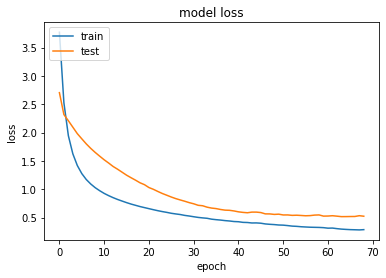

In [37]:
batch_size = 5000
epochs = 400   # Setting up higher epoch in persuit of finding global moinima,
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)   # Set up early stopping to avoid wastage of computing power
                                                                            # Kept patience level to 5 to check for considerable time to get out of local minima if possible
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [es],
                    validation_data=(X_test, y_test)
                    )


score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Observations: 

This seems to be the best model with model converging fast and providing a higher test accuracy of about 85.5%. The model took about 69 epochs to reach to global minima.

In persuit to check if the early stopping might have stopped from getting up to lower loss and higher accuracy let's try to rerun the test without early stop for about 200 iterations and see if it impacts the results.

Trying with batch size of 5000 and 200 epochs and no early stopping.

In [42]:
model = Sequential()
model.add(BatchNormalization(input_shape=(1024,))) # Set the batch normalization with input shape 32 x 32
model.add(Dense(1024, activation='relu', input_shape=(1024,)))   #First hidden layer of 1024  neurons, each neuron takes input 
                                                               # vector of size 1024



model.add(Dense(num_classes, activation='softmax'))            # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

batch_normalization_11 (None, 1024) ==> (None, 1024)
dense_30 (None, 1024) ==> (None, 1024)
dense_31 (None, 1024) ==> (None, 10)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_11 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_30 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_31 (Dense)             (None, 10)                10250     
Total params: 1,063,946
Trainable params: 1,061,898
Non-trainable params: 2,048
_________________________________________________________________
None


Epoch 1/200
9/9 [==============================] - 0s 48ms/step - loss: 3.3728 - accuracy: 0.1496 - val_loss: 2.6005 - val_accuracy: 0.1009
Epoch 2/200
9/9 [==============================] - 0s 43ms/step - loss: 2.3831 - accuracy: 0.2825 - val_loss: 2.3799 - val_accuracy: 0.1041
Epoch 3/200
9/9 [==============================] - 0s 33ms/step - loss: 1.8842 - accuracy: 0.4212 - val_loss: 2.1670 - val_accuracy: 0.2942
Epoch 4/200
9/9 [==============================] - 0s 35ms/step - loss: 1.5838 - accuracy: 0.5173 - val_loss: 2.0671 - val_accuracy: 0.4057
Epoch 5/200
9/9 [==============================] - 0s 35ms/step - loss: 1.3904 - accuracy: 0.5890 - val_loss: 1.9638 - val_accuracy: 0.4937
Epoch 6/200
9/9 [==============================] - 0s 33ms/step - loss: 1.2503 - accuracy: 0.6447 - val_loss: 1.8689 - val_accuracy: 0.5696
Epoch 7/200
9/9 [==============================] - 0s 33ms/step - loss: 1.1501 - accuracy: 0.6794 - val_loss: 1.7839 - val_accuracy: 0.6252
Epoch 8/200
9/9 [===

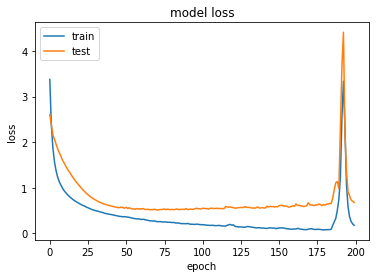

In [43]:
batch_size = 5000
epochs = 200   # Setting up higher epoch in persuit of finding global moinima,
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)   # Set up early stopping to avoid wastage of computing power
                                                                            # Kept patience level to 5 to check for considerable time to get out of local minima if possible
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    # callbacks = [es],
                    validation_data=(X_test, y_test)
                    )


score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Observations: There is not much difference to the accuracy results with higher epochs without early stop and it seems with more epochs the model learns more but ultimately the test results are same or fractional improvement. This fractional improvement is not worth the amount of time needed to run the model so we will go with early stop for this model 

With all other factors like fixed optimzer function and activation function as RELU the model with batch size of 5000 and early stopping epoch seems to be the best model overall.

## Trying with different optimizers

### Trying with SGD optimizer

In [44]:
model = Sequential()
model.add(BatchNormalization(input_shape=(1024,))) # Set the batch normalization with input shape 32 x 32
model.add(Dense(1024, activation='relu', input_shape=(1024,)))   #First hidden layer of 1024  neurons, each neuron takes input 
                                                               # vector of size 1024



model.add(Dense(num_classes, activation='softmax'))            # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

batch_normalization_12 (None, 1024) ==> (None, 1024)
dense_32 (None, 1024) ==> (None, 1024)
dense_33 (None, 1024) ==> (None, 10)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_12 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_32 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_33 (Dense)             (None, 10)                10250     
Total params: 1,063,946
Trainable params: 1,061,898
Non-trainable params: 2,048
_________________________________________________________________
None


Epoch 1/400
9/9 [==============================] - 0s 54ms/step - loss: 2.5049 - accuracy: 0.1011 - val_loss: 2.3078 - val_accuracy: 0.1055
Epoch 2/400
9/9 [==============================] - 0s 40ms/step - loss: 2.3768 - accuracy: 0.1175 - val_loss: 2.3020 - val_accuracy: 0.1153
Epoch 3/400
9/9 [==============================] - 0s 36ms/step - loss: 2.3307 - accuracy: 0.1348 - val_loss: 2.2984 - val_accuracy: 0.1152
Epoch 4/400
9/9 [==============================] - 0s 35ms/step - loss: 2.2918 - accuracy: 0.1557 - val_loss: 2.2912 - val_accuracy: 0.1489
Epoch 5/400
9/9 [==============================] - 0s 33ms/step - loss: 2.2575 - accuracy: 0.1802 - val_loss: 2.2851 - val_accuracy: 0.1563
Epoch 6/400
9/9 [==============================] - 0s 36ms/step - loss: 2.2265 - accuracy: 0.2009 - val_loss: 2.2775 - val_accuracy: 0.1729
Epoch 7/400
9/9 [==============================] - 0s 33ms/step - loss: 2.1982 - accuracy: 0.2225 - val_loss: 2.2692 - val_accuracy: 0.2013
Epoch 8/400
9/9 [===

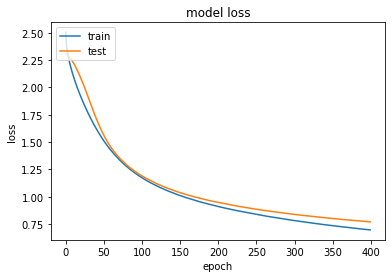

In [45]:
batch_size = 5000
epochs = 400   # Setting up higher epoch in persuit of finding global moinima,
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)   # Set up early stopping to avoid wastage of computing power
                                                                            # Kept patience level to 5 to check for considerable time to get out of local minima if possible
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [es],
                    validation_data=(X_test, y_test)
                    )


score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Observations: The model descends very gradually and even at 400 epochs still does not seem to have reached the optimal point. We can try for more epochs but it might be wastage of resource and time so will drop this model option.

### Trying adagrad 

In [46]:
model = Sequential()
model.add(BatchNormalization(input_shape=(1024,))) # Set the batch normalization with input shape 32 x 32
model.add(Dense(1024, activation='relu', input_shape=(1024,)))   #First hidden layer of 1024  neurons, each neuron takes input 
                                                               # vector of size 1024



model.add(Dense(num_classes, activation='softmax'))            # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

batch_normalization_13 (None, 1024) ==> (None, 1024)
dense_34 (None, 1024) ==> (None, 1024)
dense_35 (None, 1024) ==> (None, 10)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_13 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_34 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_35 (Dense)             (None, 10)                10250     
Total params: 1,063,946
Trainable params: 1,061,898
Non-trainable params: 2,048
_________________________________________________________________
None


Epoch 1/400
9/9 [==============================] - 0s 54ms/step - loss: 3.1072 - accuracy: 0.1410 - val_loss: 2.4173 - val_accuracy: 0.1184
Epoch 2/400
9/9 [==============================] - 0s 37ms/step - loss: 2.1516 - accuracy: 0.2676 - val_loss: 2.2887 - val_accuracy: 0.1237
Epoch 3/400
9/9 [==============================] - 0s 37ms/step - loss: 1.9995 - accuracy: 0.3420 - val_loss: 2.2390 - val_accuracy: 0.1763
Epoch 4/400
9/9 [==============================] - 0s 35ms/step - loss: 1.8732 - accuracy: 0.4149 - val_loss: 2.2068 - val_accuracy: 0.2553
Epoch 5/400
9/9 [==============================] - 0s 34ms/step - loss: 1.7815 - accuracy: 0.4715 - val_loss: 2.1678 - val_accuracy: 0.3594
Epoch 6/400
9/9 [==============================] - 0s 33ms/step - loss: 1.7125 - accuracy: 0.5078 - val_loss: 2.1309 - val_accuracy: 0.4101
Epoch 7/400
9/9 [==============================] - 0s 32ms/step - loss: 1.6538 - accuracy: 0.5323 - val_loss: 2.0968 - val_accuracy: 0.4453
Epoch 8/400
9/9 [===

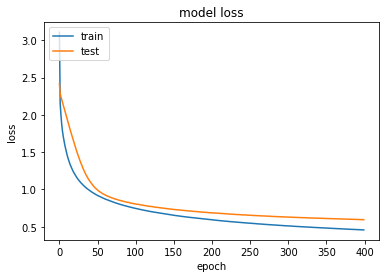

In [47]:
batch_size = 5000
epochs = 400   # Setting up higher epoch in persuit of finding global moinima,
model.compile(loss='categorical_crossentropy',
              optimizer='adagrad', # With adagrad
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)   # Set up early stopping to avoid wastage of computing power
                                                                            # Kept patience level to 5 to check for considerable time to get out of local minima if possible
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [es],
                    validation_data=(X_test, y_test)
                    )


score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Observations: AS with SGD, adagrad converges slowly but better than SGD, some more epoch could help in better accuracy but no point to check further.

### Trying RMSProps

In [48]:
model = Sequential()
model.add(BatchNormalization(input_shape=(1024,))) # Set the batch normalization with input shape 32 x 32
model.add(Dense(1024, activation='relu', input_shape=(1024,)))   #First hidden layer of 1024  neurons, each neuron takes input 
                                                               # vector of size 1024



model.add(Dense(num_classes, activation='softmax'))            # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

batch_normalization_14 (None, 1024) ==> (None, 1024)
dense_36 (None, 1024) ==> (None, 1024)
dense_37 (None, 1024) ==> (None, 10)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_14 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_36 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_37 (Dense)             (None, 10)                10250     
Total params: 1,063,946
Trainable params: 1,061,898
Non-trainable params: 2,048
_________________________________________________________________
None


Epoch 1/400
9/9 [==============================] - 1s 56ms/step - loss: 9.1142 - accuracy: 0.1191 - val_loss: 4.9801 - val_accuracy: 0.1084
Epoch 2/400
9/9 [==============================] - 0s 39ms/step - loss: 4.6194 - accuracy: 0.1886 - val_loss: 3.5832 - val_accuracy: 0.1002
Epoch 3/400
9/9 [==============================] - 0s 36ms/step - loss: 4.0018 - accuracy: 0.2306 - val_loss: 3.6570 - val_accuracy: 0.1428
Epoch 4/400
9/9 [==============================] - 0s 35ms/step - loss: 3.5313 - accuracy: 0.2739 - val_loss: 3.2814 - val_accuracy: 0.1896
Epoch 5/400
9/9 [==============================] - 0s 35ms/step - loss: 3.8160 - accuracy: 0.2841 - val_loss: 3.4289 - val_accuracy: 0.1659
Epoch 6/400
9/9 [==============================] - 0s 34ms/step - loss: 3.4996 - accuracy: 0.3100 - val_loss: 2.8065 - val_accuracy: 0.1694
Epoch 7/400
9/9 [==============================] - 0s 35ms/step - loss: 3.0816 - accuracy: 0.3420 - val_loss: 3.0406 - val_accuracy: 0.2166
Epoch 8/400
9/9 [===

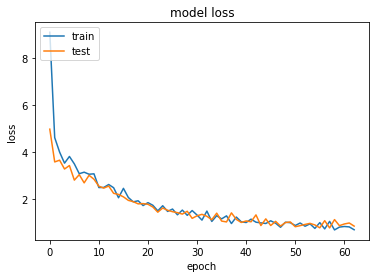

In [49]:
batch_size = 5000
epochs = 400   # Setting up higher epoch in persuit of finding global moinima,
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)   # Set up early stopping to avoid wastage of computing power
                                                                            # Kept patience level to 5 to check for considerable time to get out of local minima if possible
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [es],
                    validation_data=(X_test, y_test)
                    )


score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Observations: 

The graph is having a lot of fluctuations meaning the model is not stable. It seems to be getting stuck within local minima a lot. Though it converges faster but the overall performance is lower with giving test accuracy of only 76.5. We could try without early stops but that could mean that the model might get stuck more in local mimimas taking more time to converge.

### Trying adamax

In [50]:
model = Sequential()
model.add(BatchNormalization(input_shape=(1024,))) # Set the batch normalization with input shape 32 x 32
model.add(Dense(1024, activation='relu', input_shape=(1024,)))   #First hidden layer of 1024  neurons, each neuron takes input 
                                                               # vector of size 1024



model.add(Dense(num_classes, activation='softmax'))            # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

batch_normalization_15 (None, 1024) ==> (None, 1024)
dense_38 (None, 1024) ==> (None, 1024)
dense_39 (None, 1024) ==> (None, 10)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_15 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_38 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_39 (Dense)             (None, 10)                10250     
Total params: 1,063,946
Trainable params: 1,061,898
Non-trainable params: 2,048
_________________________________________________________________
None


Epoch 1/400
9/9 [==============================] - 0s 52ms/step - loss: 3.4184 - accuracy: 0.1352 - val_loss: 2.4773 - val_accuracy: 0.0959
Epoch 2/400
9/9 [==============================] - 0s 37ms/step - loss: 2.3601 - accuracy: 0.2432 - val_loss: 2.2798 - val_accuracy: 0.1761
Epoch 3/400
9/9 [==============================] - 0s 36ms/step - loss: 1.9913 - accuracy: 0.3466 - val_loss: 2.2559 - val_accuracy: 0.1879
Epoch 4/400
9/9 [==============================] - 0s 35ms/step - loss: 1.7913 - accuracy: 0.4401 - val_loss: 2.1705 - val_accuracy: 0.3104
Epoch 5/400
9/9 [==============================] - 0s 33ms/step - loss: 1.6526 - accuracy: 0.5058 - val_loss: 2.1133 - val_accuracy: 0.3965
Epoch 6/400
9/9 [==============================] - 0s 33ms/step - loss: 1.5479 - accuracy: 0.5577 - val_loss: 2.0521 - val_accuracy: 0.5168
Epoch 7/400
9/9 [==============================] - 0s 33ms/step - loss: 1.4614 - accuracy: 0.6002 - val_loss: 1.9973 - val_accuracy: 0.5606
Epoch 8/400
9/9 [===

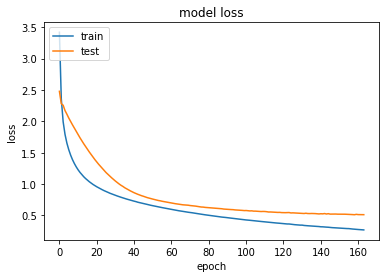

In [51]:
batch_size = 5000
epochs = 400   # Setting up higher epoch in persuit of finding global moinima,
model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)   # Set up early stopping to avoid wastage of computing power
                                                                            # Kept patience level to 5 to check for considerable time to get out of local minima if possible
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [es],
                    validation_data=(X_test, y_test)
                    )


score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Observations:

The model converges steadily and reaches the minima with early stopping at about 164 epochs. The model has the highest accuracy of about 86% which is a bit higher than adam

Though this performs better but adam reaches the lowest minima quicker hence taking the benefit of epoch count the optimizer with "ADAM" should be preferred for a very small loss in accuracy.

## Build the final model with ADAM optimizer.

Use the following as model:

Optimizer: ADAM

Aactivation: RELU

BATCH_SIZE: 5000

EPOCHS: 400 (with early stopping)

with batchNormailization enabled

In [52]:
model = Sequential()
model.add(BatchNormalization(input_shape=(1024,))) # Set the batch normalization with input shape 32 x 32
model.add(Dense(1024, activation='relu', input_shape=(1024,)))   #First hidden layer of 1024  neurons, each neuron takes input 
                                                               # vector of size 1024



model.add(Dense(num_classes, activation='softmax'))            # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

batch_normalization_16 (None, 1024) ==> (None, 1024)
dense_40 (None, 1024) ==> (None, 1024)
dense_41 (None, 1024) ==> (None, 10)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_16 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_40 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_41 (Dense)             (None, 10)                10250     
Total params: 1,063,946
Trainable params: 1,061,898
Non-trainable params: 2,048
_________________________________________________________________
None


Epoch 1/400
9/9 [==============================] - 0s 54ms/step - loss: 3.8055 - accuracy: 0.1310 - val_loss: 2.5908 - val_accuracy: 0.1219
Epoch 2/400
9/9 [==============================] - 0s 40ms/step - loss: 2.4853 - accuracy: 0.2575 - val_loss: 2.3409 - val_accuracy: 0.1997
Epoch 3/400
9/9 [==============================] - 0s 37ms/step - loss: 1.9758 - accuracy: 0.3730 - val_loss: 2.2110 - val_accuracy: 0.3312
Epoch 4/400
9/9 [==============================] - 0s 34ms/step - loss: 1.6497 - accuracy: 0.4913 - val_loss: 2.1063 - val_accuracy: 0.2880
Epoch 5/400
9/9 [==============================] - 0s 34ms/step - loss: 1.4480 - accuracy: 0.5677 - val_loss: 1.9861 - val_accuracy: 0.5086
Epoch 6/400
9/9 [==============================] - 0s 33ms/step - loss: 1.2995 - accuracy: 0.6224 - val_loss: 1.8918 - val_accuracy: 0.5504
Epoch 7/400
9/9 [==============================] - 0s 35ms/step - loss: 1.1864 - accuracy: 0.6680 - val_loss: 1.8040 - val_accuracy: 0.6265
Epoch 8/400
9/9 [===

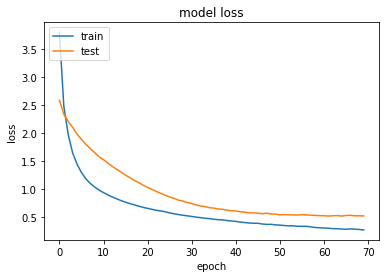

In [53]:
batch_size = 5000
epochs = 400   # Setting up higher epoch in persuit of finding global moinima,
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)   # Set up early stopping to avoid wastage of computing power
                                                                            # Kept patience level to 5 to check for considerable time to get out of local minima if possible
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [es],
                    validation_data=(X_test, y_test)
                    )


score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

This looks to ba pity good and stable model with one of the best accuracy and converging much faster reducing the computation time.

Use this model for further analysis.

# Print the classification accuracy metrics (Print Both Classification report and Confusion Matrix )

In [54]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
y_true = np.argmax(y_test, axis=1) 
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test)[1]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
563/563 [==============================] - 2s 3ms/step - loss: 0.5239 - accuracy: 0.8552
Accuracy Model1 (Dropout): 0.8551666736602783


Model accuracy is 85.40 %

Classification report

In [55]:
print(classification_report(y_true, Y_pred_cls)) # Print the classification report

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1814
           1       0.86      0.86      0.86      1828
           2       0.90      0.87      0.89      1803
           3       0.80      0.83      0.81      1719
           4       0.89      0.89      0.89      1812
           5       0.85      0.85      0.85      1768
           6       0.83      0.83      0.83      1832
           7       0.89      0.89      0.89      1808
           8       0.83      0.80      0.82      1812
           9       0.85      0.84      0.84      1804

    accuracy                           0.86     18000
   macro avg       0.86      0.86      0.85     18000
weighted avg       0.86      0.86      0.86     18000



Confusion Matrix

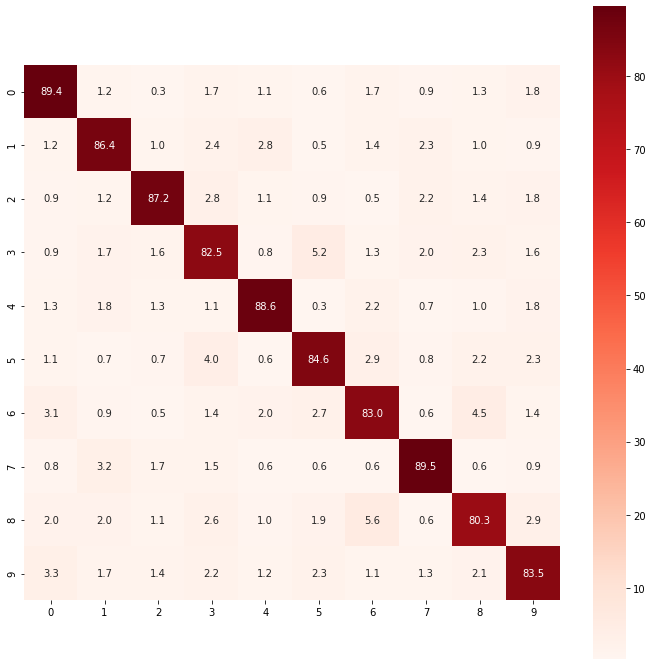

In [56]:
conf = confusion_matrix(y_true, Y_pred_cls)
plt.figure(figsize=(12, 12))
# Normalize the confusion matrix
conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis] * 100.0
# Visualize the confusion matrix
sn.heatmap(conf, annot=True, cmap='Reds', fmt='.1f', square=True);

Observations
Based on both the classification and confusion matrix we can observer that: 
1. The model is able to predict value of 0 followed by 7 quite well
2. The model has lowest predictability for 3 and 8 which is clearly evident as 3 and 8 resemble closely in texture.